In [1]:
import gym
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np
import timebudget
from tqdm.auto import tqdm
timebudget.set_quiet()

In [2]:
import rltrain
from importlib import reload
reload(rltrain)
import helpers
reload(helpers)

<module 'helpers' from '/Users/leodirac/dev/ddpg/helpers.py'>

In [3]:
env = gym.make('Pendulum-v0')
#env = gym.make('LunarLanderContinuous-v2')
learner = rltrain.DDPG(env, gamma=0.9, net_args={'hidden_dims': [5]})

learner.show_loss_every = 100000
viz = helpers.PendulumViz(learner)

Actor (mu): FCNet(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=5, bias=True)
    (1): Tanh()
    (2): Linear(in_features=5, out_features=1, bias=True)
    (3): Tanh()
  )
)
Critic (Q): FCNet(
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=5, bias=True)
    (1): Tanh()
    (2): Linear(in_features=5, out_features=1, bias=True)
  )
)


Replay Buffer has 200 transitions


/Users/leodirac/dev/ddpg/rldqn.py:149: UserWarning: calc_qval_batch can usually be replaced with just forward()
  warnings.warn("calc_qval_batch can usually be replaced with just forward()")
/Users/leodirac/dev/ddpg/helpers.py:101: UserWarning: These are mu values not Q values
  warnings.warn("These are mu values not Q values")


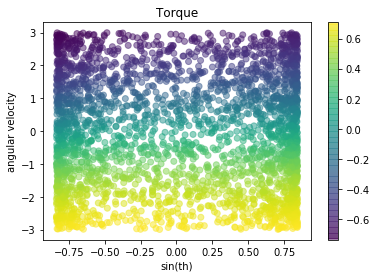

Replay Buffer has 9200 transitions


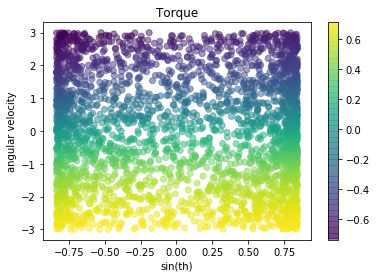

Replay Buffer has 18200 transitions


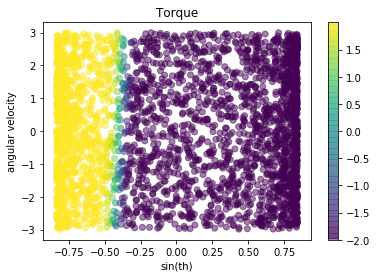

In [4]:
learner.eps = 0
for i in tqdm(range(100), "random warmup"):
    learner.rollout()
    if i % 45 == 0:
        print(f"Replay Buffer has {len(learner._replay)} transitions")
        viz.plot_q()



Eps = 1.00 on 1 of 5


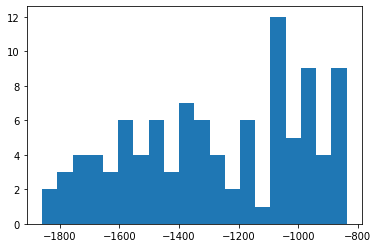

Reward mean,std = -1276.009 +/- 288.584


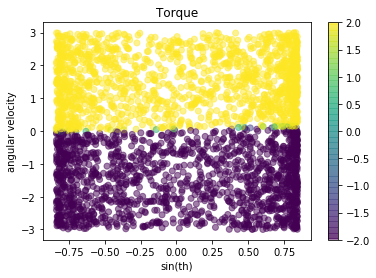



Eps = 0.78 on 2 of 5


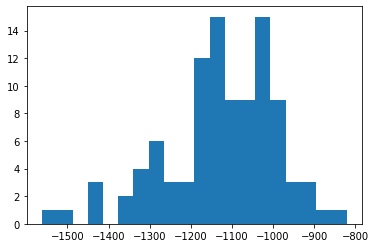

Reward mean,std = -1124.641 +/- 136.660


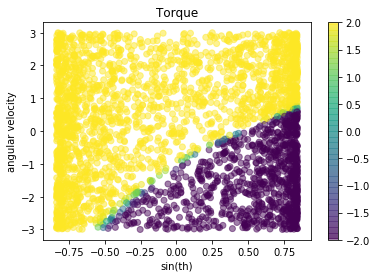



Eps = 0.56 on 3 of 5


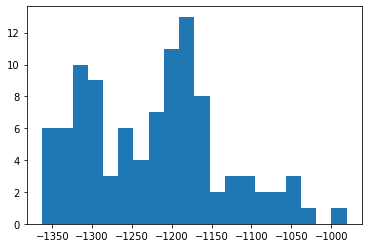

Reward mean,std = -1220.844 +/- 86.426


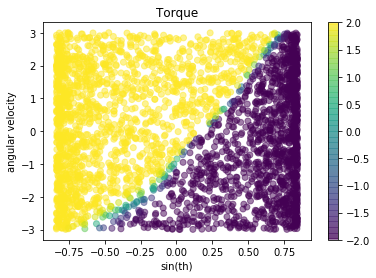



Eps = 0.33 on 4 of 5


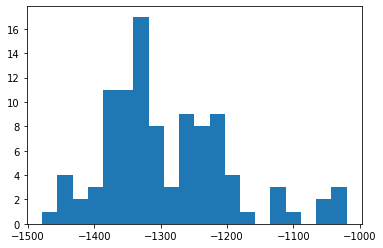

Reward mean,std = -1290.551 +/- 95.653


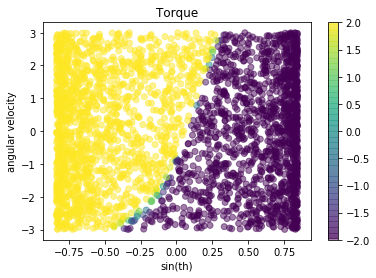



Eps = 0.11 on 5 of 5


Loss = 1.09258



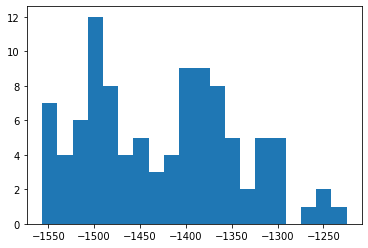

Reward mean,std = -1424.308 +/- 82.241


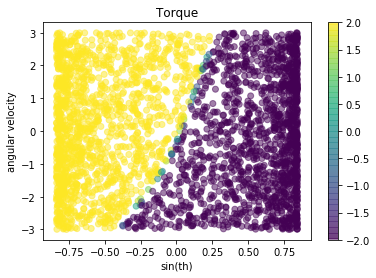

In [5]:
N = 5
for d in range(N):
    eps = 1.0 - d/(N-0.5)
    print(f"\n\nEps = {eps:.2f} on {d+1} of {N}")
    _ = helpers.rollout_score_dist(learner, eps)
    viz.plot_q()

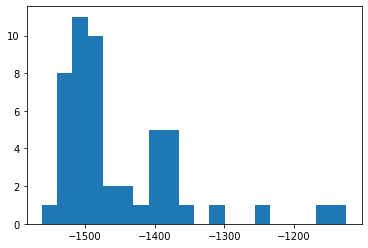

Reward mean,std = -1451.830 +/- 90.421


In [6]:
# check greedy
_ = helpers.rollout_score_dist(learner, 0, n=50)

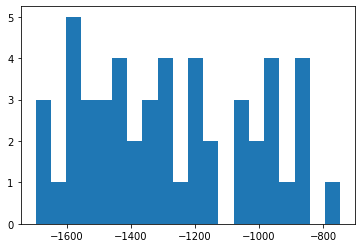

Reward mean,std = -1274.933 +/- 258.322


In [7]:
# check random
_ = helpers.rollout_score_dist(learner, 1, n=50)

In [8]:
timebudget.report('rollout')

timebudget report per rollout cycle...
                  rollout: 100.0%   567.62ms/cyc @     1.0 calls/cyc
              do_learning:  93.2%   529.23ms/cyc @   199.0 calls/cyc
            critic_update:  37.3%   211.99ms/cyc @   184.8 calls/cyc
             actor_update:  24.3%   137.74ms/cyc @   184.8 calls/cyc
             move_targets:  22.9%   130.13ms/cyc @   184.8 calls/cyc
                   sample:   7.2%    40.86ms/cyc @   184.8 calls/cyc


In [9]:
learner.eps=0
learner.rollout(render=True)

(199, -1405.1756323259892)